In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Digit Recognizer Data/train.csv/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


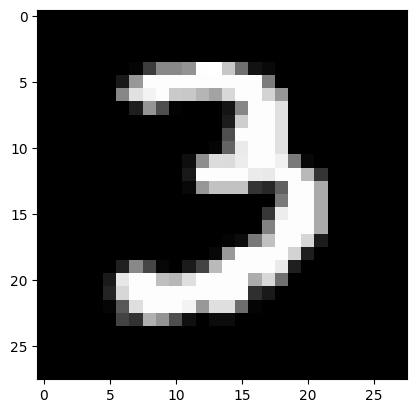

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Get the pixel values of the first image
pixels = df.iloc[9, 1:].values.reshape(28, 28)

# Display the image using matplotlib
plt.imshow(pixels, cmap='gray')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target
X=X/255.0

X=X.values.reshape(-1,28,28,1)

y = keras.utils.to_categorical(y, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

num_classes = 10

input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=30,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
1050/1050 [==============================] - 141s 133ms/step - loss: 0.2005 - accuracy: 0.9361 - val_loss: 0.0525 - val_accuracy: 0.9842
Epoch 2/30
1050/1050 [==============================] - 131s 125ms/step - loss: 0.0743 - accuracy: 0.9784 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 3/30
1050/1050 [==============================] - 130s 123ms/step - loss: 0.0584 - accuracy: 0.9838 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 4/30
1050/1050 [==============================] - 129s 123ms/step - loss: 0.0503 - accuracy: 0.9856 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 5/30
1050/1050 [==============================] - 133s 127ms/step - loss: 0.0457 - accuracy: 0.9869 - val_loss: 0.0255 - val_accuracy: 0.9931
Epoch 6/30
1050/1050 [==============================] - 133s 127ms/step - loss: 0.0437 - accuracy: 0.9881 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 7/30
1050/1050 [==============================] - 132s 126ms/step - loss: 0.0378 - accuracy: 0.9899 - val_

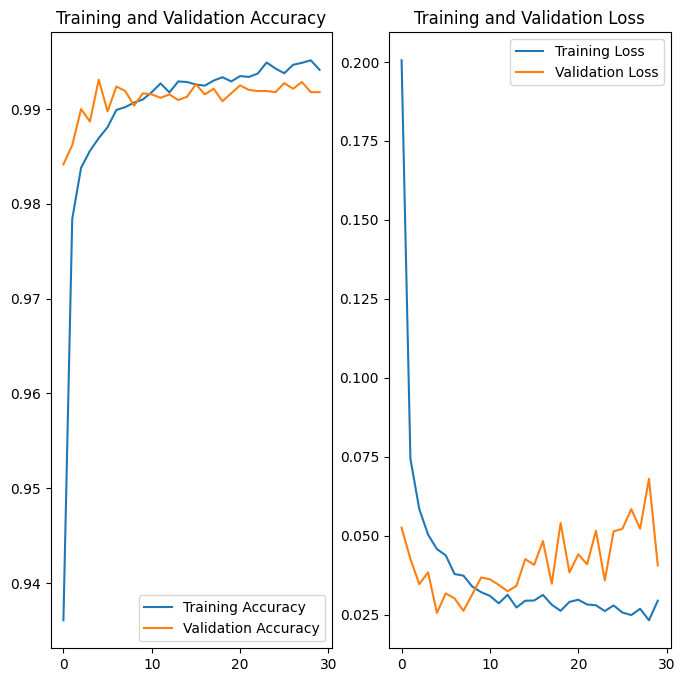

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
test_df=pd.read_csv("/content/drive/MyDrive/Digit Recognizer Data/test.csv/test.csv")
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


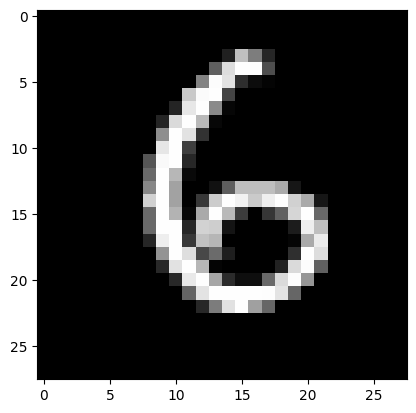

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first image as a numpy array
first_image = test_df.iloc[70].to_numpy()

# Reshape the array to a 2D matrix
reshaped_image = np.reshape(first_image, (28, 28))

# Plot the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.show()

In [12]:
test_df = test_df / 255.0
test_images = test_df.values.reshape(-1, 28, 28, 1)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 24s 28ms/step


In [23]:
predicted_labels[70]

6

In [24]:
# Save the predictions to a CSV file
results_df = pd.DataFrame({'ImageId': range(1, len(predicted_labels)+1),
                           'Label': predicted_labels})
results_df.to_csv('predictions.csv', index=False)

In [26]:
model.save("digit.h5")